<a href="https://colab.research.google.com/github/Jiraporn-klobrat/multivariate-/blob/main/Multivariate_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ให้นักศึกษาทำข้อสอบใน Colab Notebook นี้โดยกรอกข้อมูลของตัวเองใน cell ที่ 2 แล้วรัน cell ที่ 1 - 5 และเริ่มทำข้อสอบใน cell ที่ 6 เป็นต้นไป

โดยโจทย์คือ
1. ข้อมูลโจทย์ อยู่ใน ตัวแปร ```Data```
2. ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ
3. ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ
4. เปรียบเทียบความแตกต่างของผลข้อ 2. กับ ข้อ 3.
5. เขียน comments อธิบายทุกขั้นตอน
6. อัด video อธิบาย code ทุกๆขั้นตอนรวมถึงผลแล้วอัพลง youtube ในรูปแบบ unlist 
7. commit โดยใช้ชื่อ commit เป็น link youtube ที่อธิบาย code ในข้อ 6.

กำหนดส่งวันที่ 2 พฤษภาคม 2564 (โดยให้มากรอกวันที่ commit ครั้งสุดท้ายใน sheet: https://docs.google.com/spreadsheets/d/1_qJwLDJVtOW1HxBcf_FHVc6UT4J_SOonuR6o3EEnVzw/edit?usp=sharing ช่อง Final)

In [38]:
from sklearn.datasets import make_blobs
import random,math
import numpy as np
import pandas

In [39]:
Name = 'จิราพร กลบรัตน์'
ID = '623020762-6'

In [40]:
def DataGenerator(name,id):
    random.seed(int(id[3:6]))
    numfeat = random.randint(20,30)
    ct = random.randint(len(name)-6,len(name))
    
    X, y = make_blobs(n_samples=10000, centers=ct, n_features=numfeat , random_state=int(id[3:6]))

    print(f'{id[3:6]}:{numfeat}:{ct}')
    X_t = (X[:,1]*2)+int(id[3])
    X_t2 = (X[:,-1]*5)+int(id[4])

    DT = np.append(X,X_t.reshape([10000,1]),axis=1)
    DT = np.append(DT,X_t2.reshape([10000,1]),axis=1)
    
    return pandas.DataFrame(DT)

In [41]:
Data = DataGenerator(Name,ID)

020:30:15


In [42]:
Data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,-1.431317,-3.805310,-1.683298,3.670962,5.333743,6.968222,5.297155,-0.622868,-8.659695,0.506338,-2.231758,-4.966134,2.878114,7.374850,1.860676,-0.038871,2.196023,11.370829,6.688385,6.105780,-4.416389,-4.717553,9.194900,0.249966,-1.970441,4.105653,3.420734,4.639702,-1.725424,9.603881,-7.610621,50.019407
1,-0.222700,-4.318604,-1.021648,4.262164,4.447866,10.645853,4.765258,-0.790480,-8.108423,-1.114622,-2.005512,-5.068586,4.139944,7.948390,4.017807,1.361718,3.219721,8.928908,6.658795,5.475026,-4.660510,-4.876859,7.906575,-0.422501,-2.430645,1.426361,4.555166,5.161480,-1.333644,9.095333,-8.637208,47.476663
2,-10.034376,6.161892,-3.954476,-8.050792,-5.352337,6.411617,-6.332182,-7.345645,-7.169272,10.553513,2.975710,0.441505,1.776539,7.340909,0.620935,3.145672,5.817364,8.331761,-8.568314,-4.763978,7.189534,0.715256,-2.086542,3.539530,0.488147,-3.906897,5.546570,-6.069777,7.307131,-8.493889,12.323783,-40.469445
3,2.807811,3.136014,3.270353,6.546945,-5.862550,-12.552502,6.869210,4.978822,-0.880895,7.677638,-2.179459,6.689613,5.866614,2.598473,11.440434,9.917409,6.283930,-1.044869,-11.599362,7.609711,-8.686592,-3.201546,-5.693836,10.478092,-5.883031,-4.733943,-2.132558,-9.512157,0.184631,-8.506297,6.272028,-40.531484
4,0.981739,5.057586,6.035421,6.643368,-9.726732,7.433159,8.389728,-5.688372,4.057948,-1.067151,-0.113727,3.773041,7.207748,8.921411,9.088559,3.895733,-7.498781,8.757467,-2.416330,4.642086,7.698492,-0.165685,6.799617,9.441419,10.733818,-3.927096,-4.872414,-7.582712,-0.734257,7.437834,10.115172,39.189171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,8.570252,-8.547499,-6.627521,-0.738247,5.041646,8.379100,8.531765,1.861021,-1.478735,-1.421689,4.005371,2.120472,5.035665,-3.002748,8.055580,7.182527,-6.023813,2.258496,7.288834,-8.409583,-10.399815,7.948018,5.700540,6.105651,7.671632,-3.864644,-7.989939,5.141135,-1.598991,5.689240,-17.094999,30.446201
9996,-10.438886,5.510990,-1.623076,-9.326215,-6.385069,6.938657,-6.563878,-8.289501,-5.761271,7.928461,3.251750,1.482022,1.123383,5.989536,1.200461,0.735872,4.707533,8.231279,-10.546153,-4.309346,5.425850,2.465032,-3.326625,1.770823,2.090981,-3.050056,6.267379,-6.057672,8.780392,-10.478475,11.021979,-50.392375
9997,-2.171386,-3.572374,-2.281624,9.609861,3.647927,-7.071517,5.912975,-1.965732,6.946705,-2.177729,-5.651136,-0.720117,-7.696067,-6.032868,-3.678252,2.299576,-0.520670,6.917413,1.350440,-7.531208,6.656311,-5.945639,-10.804183,-1.086603,5.390014,-5.256982,-3.354696,9.149446,9.679640,3.251425,-7.144748,18.257126
9998,0.578091,6.232268,5.490281,5.679421,-9.322961,7.872634,8.821317,-4.478623,6.994061,-1.793188,0.012370,3.955197,8.481484,6.869151,11.919347,2.971310,-9.245483,6.041311,-1.832211,3.352620,8.421936,0.247541,7.469489,9.172441,11.945841,-4.429715,-6.446364,-4.332076,0.118959,7.302469,12.464536,38.512345


# 1. ข้อมูลโจทย์ อยู่ใน ตัวแปร Data

In [43]:
Data.shape   #ดูขนาดของข้อมูล

(10000, 32)

ทำการตัดข้อมูล correlation ที่ซ้ำกันออก เพื่อให้ข้อมูลลดลง

In [44]:
corr = np.corrcoef(Data.to_numpy().T)    # .T เพื่อกลับแถวเป็นหลักกลับหลักเป็นแถว

In [45]:
corr.shape      #ดูขนาดของข้อมูล corr

(32, 32)

In [46]:
corr

array([[ 1.        , -0.02653607,  0.0842682 , ...,  0.33009125,
        -0.02653607,  0.33009125],
       [-0.02653607,  1.        ,  0.28305517, ..., -0.143743  ,
         1.        , -0.143743  ],
       [ 0.0842682 ,  0.28305517,  1.        , ..., -0.10285165,
         0.28305517, -0.10285165],
       ...,
       [ 0.33009125, -0.143743  , -0.10285165, ...,  1.        ,
        -0.143743  ,  1.        ],
       [-0.02653607,  1.        ,  0.28305517, ..., -0.143743  ,
         1.        , -0.143743  ],
       [ 0.33009125, -0.143743  , -0.10285165, ...,  1.        ,
        -0.143743  ,  1.        ]])

In [47]:
for i in range(corr.shape[0]):  # วนลูปเพื่อดูค่า corr ว่าตัวใดมีค่าเท่ากับ1 โดยค่าต้องไม่มาจากเส้นทแยงมุม
    for j in range(corr.shape[1]):
        if (i !=j) and (corr[i,j] == 1.):
            print(f'row = {i}  column = {j}  corrcoef = {corr[i,j]}')   #วนลูปเพื่อดูค่า corr ที่ซ้ำกัน

row = 1  column = 30  corrcoef = 1.0
row = 29  column = 31  corrcoef = 1.0
row = 30  column = 1  corrcoef = 1.0
row = 31  column = 29  corrcoef = 1.0


 เนื่องจากทำการวนลูปและทราบว่ามีค่าที่ซ้ำกัน ดังนั้นต้องตัดข้อมูลที่ซ้ำออกก่อน เพื่อนำข้อมูลไปใช้

In [48]:
newdata = Data.iloc[1:,:31] #แสดงข้อมูลทั้งหมดใน colums
newdata

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
1,-0.222700,-4.318604,-1.021648,4.262164,4.447866,10.645853,4.765258,-0.790480,-8.108423,-1.114622,-2.005512,-5.068586,4.139944,7.948390,4.017807,1.361718,3.219721,8.928908,6.658795,5.475026,-4.660510,-4.876859,7.906575,-0.422501,-2.430645,1.426361,4.555166,5.161480,-1.333644,9.095333,-8.637208
2,-10.034376,6.161892,-3.954476,-8.050792,-5.352337,6.411617,-6.332182,-7.345645,-7.169272,10.553513,2.975710,0.441505,1.776539,7.340909,0.620935,3.145672,5.817364,8.331761,-8.568314,-4.763978,7.189534,0.715256,-2.086542,3.539530,0.488147,-3.906897,5.546570,-6.069777,7.307131,-8.493889,12.323783
3,2.807811,3.136014,3.270353,6.546945,-5.862550,-12.552502,6.869210,4.978822,-0.880895,7.677638,-2.179459,6.689613,5.866614,2.598473,11.440434,9.917409,6.283930,-1.044869,-11.599362,7.609711,-8.686592,-3.201546,-5.693836,10.478092,-5.883031,-4.733943,-2.132558,-9.512157,0.184631,-8.506297,6.272028
4,0.981739,5.057586,6.035421,6.643368,-9.726732,7.433159,8.389728,-5.688372,4.057948,-1.067151,-0.113727,3.773041,7.207748,8.921411,9.088559,3.895733,-7.498781,8.757467,-2.416330,4.642086,7.698492,-0.165685,6.799617,9.441419,10.733818,-3.927096,-4.872414,-7.582712,-0.734257,7.437834,10.115172
5,3.505251,1.657214,2.027504,6.243717,-2.966860,-7.778522,7.457068,5.803688,2.910542,7.486494,-2.028465,5.427090,4.780364,4.188361,11.324828,10.388716,7.653717,-3.519595,-10.954537,8.408032,-11.121467,-2.957681,-4.487006,7.719704,-4.678739,-3.802615,-3.399993,-8.945305,0.878750,-8.450332,3.314428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,8.570252,-8.547499,-6.627521,-0.738247,5.041646,8.379100,8.531765,1.861021,-1.478735,-1.421689,4.005371,2.120472,5.035665,-3.002748,8.055580,7.182527,-6.023813,2.258496,7.288834,-8.409583,-10.399815,7.948018,5.700540,6.105651,7.671632,-3.864644,-7.989939,5.141135,-1.598991,5.689240,-17.094999
9996,-10.438886,5.510990,-1.623076,-9.326215,-6.385069,6.938657,-6.563878,-8.289501,-5.761271,7.928461,3.251750,1.482022,1.123383,5.989536,1.200461,0.735872,4.707533,8.231279,-10.546153,-4.309346,5.425850,2.465032,-3.326625,1.770823,2.090981,-3.050056,6.267379,-6.057672,8.780392,-10.478475,11.021979
9997,-2.171386,-3.572374,-2.281624,9.609861,3.647927,-7.071517,5.912975,-1.965732,6.946705,-2.177729,-5.651136,-0.720117,-7.696067,-6.032868,-3.678252,2.299576,-0.520670,6.917413,1.350440,-7.531208,6.656311,-5.945639,-10.804183,-1.086603,5.390014,-5.256982,-3.354696,9.149446,9.679640,3.251425,-7.144748
9998,0.578091,6.232268,5.490281,5.679421,-9.322961,7.872634,8.821317,-4.478623,6.994061,-1.793188,0.012370,3.955197,8.481484,6.869151,11.919347,2.971310,-9.245483,6.041311,-1.832211,3.352620,8.421936,0.247541,7.469489,9.172441,11.945841,-4.429715,-6.446364,-4.332076,0.118959,7.302469,12.464536


# 2. ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ

### Import

In [49]:
from sklearn.cluster import KMeans   

### Define

In [50]:
kmeans = KMeans(n_clusters=3, random_state=2021)

### Fit-Transform


In [52]:
kmeans.fit(Data)  # คำนวณหาจุด cluter centers ของข้อมูล Data ด้วยวิธี K-means clustering

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2021, tol=0.0001, verbose=0)

In [53]:
kmeans.cluster_centers_ #แสดงจุดที่คำนวณได้

array([[ 1.27368952e+00,  2.69721312e+00, -2.18861418e+00,
         1.52049597e+00,  1.35948763e+00, -1.66342049e+00,
         2.66935986e+00,  2.12110594e+00,  3.97591973e+00,
        -2.26167165e+00,  6.99883575e-01, -3.85316449e-01,
        -1.36166225e+00, -1.15609100e+00, -3.94378168e+00,
        -4.05717315e-01, -4.85074635e-02,  1.73272007e+00,
         1.48231748e+00, -1.82873887e+00,  1.04893095e+00,
        -9.98687639e-01, -4.45434330e-01, -2.24636768e+00,
         3.91775303e+00, -3.05079689e+00,  5.11040188e-01,
         2.01566556e+00,  1.31604442e+00,  2.33661803e+00,
         5.39442623e+00,  1.36830902e+01],
       [-1.95455906e+00,  7.94491819e-01,  3.33008156e-02,
        -1.03548443e+00,  6.05310320e-01, -2.90237233e+00,
        -1.51176216e+00, -3.07488307e+00, -2.45356592e+00,
         3.03728067e+00, -1.05565746e+00,  3.74117892e+00,
         3.86391944e+00,  3.43520462e+00,  9.19527635e-01,
         4.78632917e+00,  5.14215577e+00,  1.92097748e+00,
        -8.14

In [60]:
y = kmeans.predict(Data)   #ทำการจัดกลุ่มของ Data
y

array([2, 2, 1, ..., 0, 2, 2], dtype=int32)

In [59]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

new_pca = pca.fit_transform(Data)


In [61]:
from matplotlib import pyplot as plt

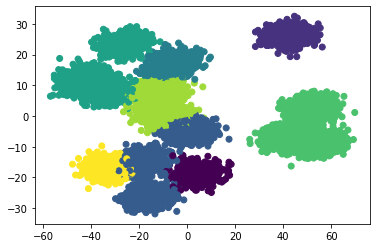

In [65]:
kmeans = KMeans(random_state=2021)
kmeans.fit(Data)
y = kmeans.predict(Data)

plt.scatter(new_pca[:,0],new_pca[:,1],c=y)      # plot กราฟเพื่อดูการกระจายของกลุ่มข้อมูล

ค่า K ควรจะเป็นเท่าไหร่ คำนวณหาค่า k  ด้วยวิธี 
Elbow Method

SSE

In [66]:
kmeans.inertia_     ## SSE (Sum of Squared Errors) คำนวณค่า SSE

5136927.9223541105

In [67]:
SSE = list()
for k in [1,2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters=k, random_state=2021)
    kmeans.fit(Data)
    SSE.append(kmeans.inertia_)

In [68]:
SSE

[20638831.92010504,
 12176335.794695133,
 10196224.23516815,
 8970661.80275478,
 7903901.912406155,
 6875446.393153721,
 6150175.424016003,
 5136927.9223541105]

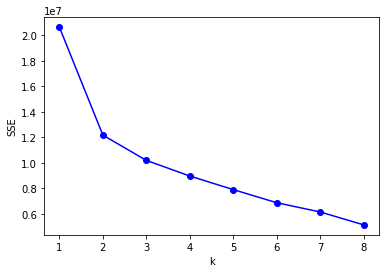

In [71]:
plt.plot([1,2,3,4,5,6,7,8],SSE,'o-b')

plt.xlabel('k')
plt.ylabel('SSE'); # นำค่าที่ได้มา plot กราฟ เพื่อดูว่า k มีกี่กลุ่ม

จากกราฟ มี k ทั้งหมด 8 กลุ่ม

หาค่า k ด้วยวิธี Silhouette coefficient

In [72]:
from sklearn import metrics

In [76]:
SilH = list()
for k in [2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters=k, random_state=2021)
    kmeans.fit(Data)
    score = metrics.silhouette_score(Data,kmeans.labels_)
    SilH.append(score)

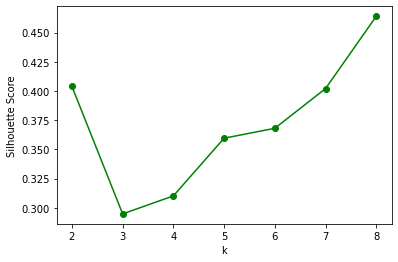

In [77]:
plt.plot([2,3,4,5,6,7,8],SilH,'o-g')
plt.xlabel('k')
plt.ylabel('Silhouette Score');

จากกราฟ มี k ทั้งหมด 8 กลุ่ม

In [87]:
plt.rcParams['figure.figsize']=[10,15]  #กำหนดขนาดกราฟ

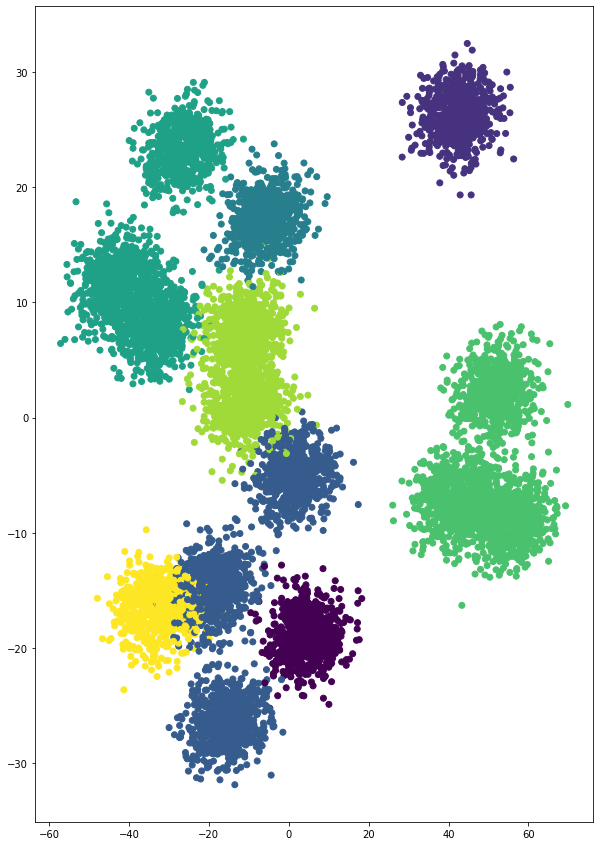

In [100]:
kmeans = KMeans(random_state=2021)
kmeans.fit(Data)
y = kmeans.predict(Data)
plt.scatter(new_pca[:,0],new_pca[:,1],c=y)

จากกราฟ มี k ทั้งหมด 8 กลุ่ม และข้อมูลซ้อนกัน

# 3. ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ

### วิธี MDS

In [94]:
from sklearn.manifold import MDS

In [98]:
model = MDS(n_components=2)

In [99]:
new_model = model.fit_transform(Data)

K-means

In [103]:
kmeans2 = KMeans(n_clusters=8,random_state=2021)  #ให้ k= 8 เนื่องจากคำนวณค่า k ได้ เท่ากับ 8
kmeans2.fit(Data)
g = kmeans2.predict(Data)

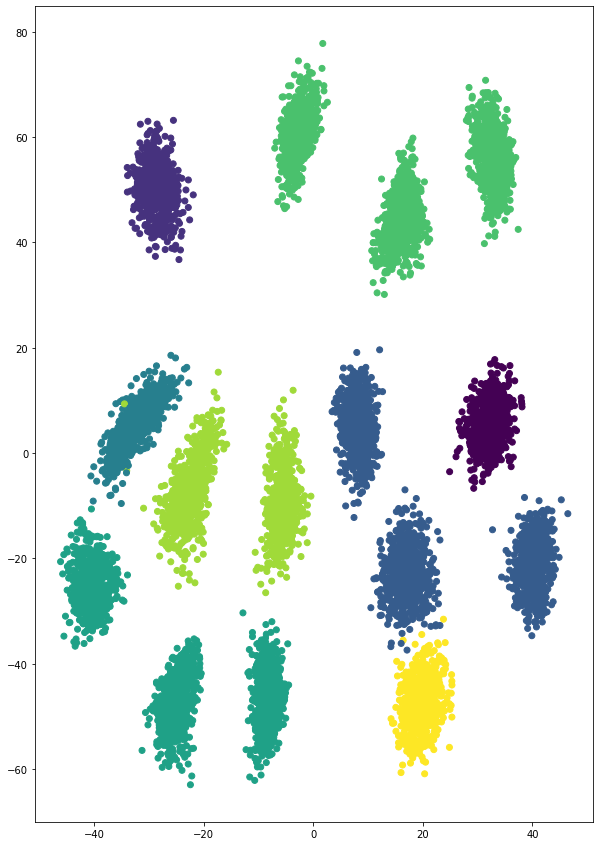

In [105]:
kmeans = KMeans(random_state=2021)
kmeans.fit(Data)
y = kmeans.predict(Data)
plt.scatter(new_model[:,0],new_model[:,1],c=y)

# 4. เปรียบเทียบความแตกต่างของผลข้อ 2. กับ ข้อ 3.

#### กราฟข้อ 2 ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ

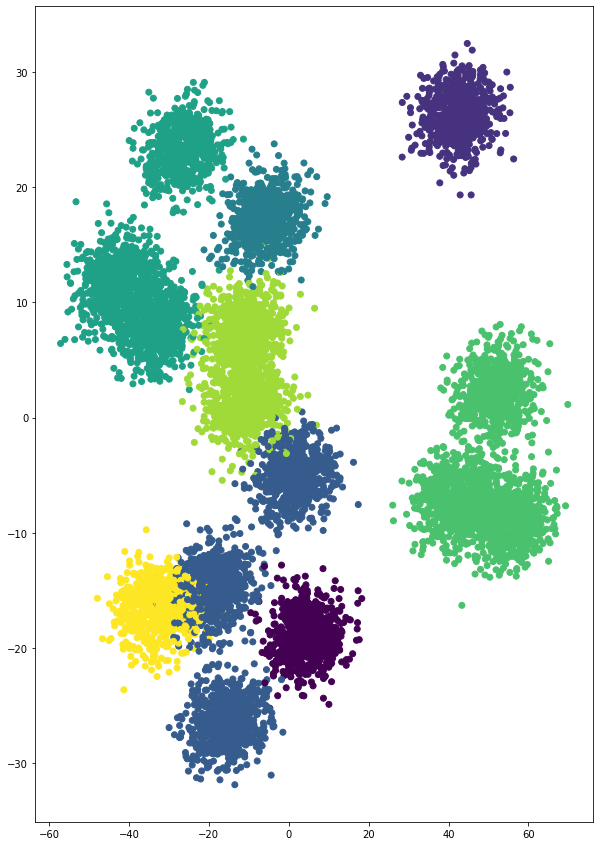

In [106]:
kmeans = KMeans(random_state=2021)
kmeans.fit(Data)
y = kmeans.predict(Data)
plt.scatter(new_pca[:,0],new_pca[:,1],c=y)

### กราฟข้อ 3 ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ

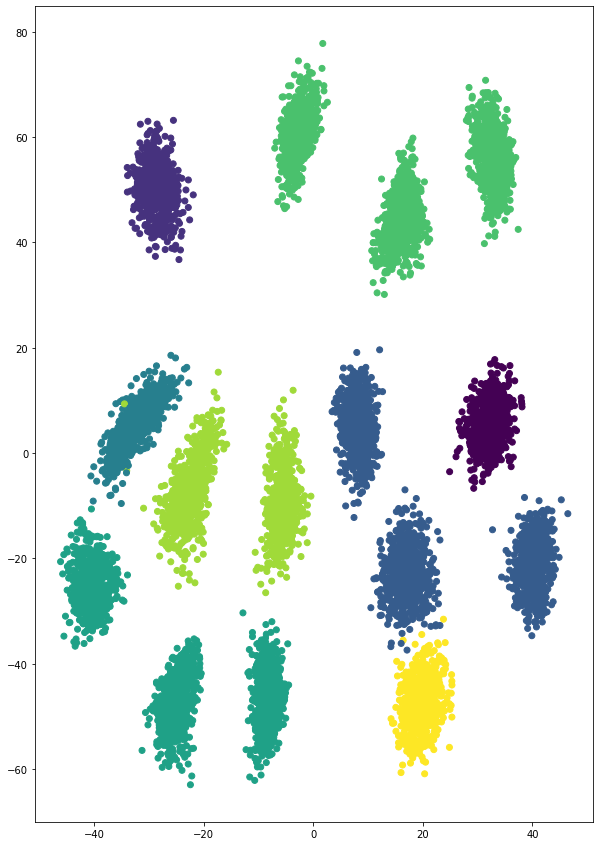

In [107]:
kmeans = KMeans(random_state=2021)
kmeans.fit(Data)
y = kmeans.predict(Data)
plt.scatter(new_model[:,0],new_model[:,1],c=y)

จากการเปรียบเทียบความแตกต่างของผลข้อ 2. กับ ข้อ 3.
โดยที่ข้อ 2 ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ ส่วนข้อ3 ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติได้ข้อสรุป ดังนี้
1. ข้อมูลแบบ 2 มิติ ถ้าทำการลด dimension แล้วทำ clustering แบบกราฟในข้อ 3 ข้อมูจะมีการกระจายที่เปลี่ยนไป และการกระจายของข้อมูลเล็กลง เพราะ dimension ลดลง แต่ระยะห่างยังเท่าเดิม 
2. ข้อมูลต่างจากข้อ 2 เนื่องจากการกระจายของข้อมูลมีขนาดใหญ่เพราะไม่ได้ทำการลด dimension

https://youtu.be/PHA25_FVINE